In [1]:
%cd /scratch/bruingjde/SNAM2021-code/

import os
import json
import typing

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import sklearn.pipeline
import sklearn.preprocessing
from tqdm.auto import tqdm

import tlp

/scratch/bruingjde/SNAM2021-code


In [2]:
def get_cheap_stats():
  result = dict()
  entries = sorted(os.scandir('data'), key=lambda x: x.name)
  for entry in entries:
    filepath = os.path.join(entry.path, 'stats.json')
    if os.path.isfile(filepath):
      with open(filepath) as file:
        result[int(entry.name)] = json.load(file)
    else:
      print(f'{filepath} does not exist')
  return pd.DataFrame.from_dict(result, orient='index')

In [4]:
stats = get_cheap_stats()

data/26/stats.json does not exist
data/27/stats.json does not exist


In [31]:
stats.sort_values('nodes')

,edges,density (nx.MultiGraph),fraction edges in GC,nodes,avg events per pair,density (nx.Graph),degree assortativity (nx.Graph),average clustering coefficient,fraction nodes in GC,avg events per pair in GC
12,82927,5.982757,1.000000,167,25.508151,0.234543,-0.294441,0.591863,1.000000,25.508151
13,33720,0.083538,1.000000,899,4.795904,0.017419,-0.092248,0.070458,1.000000,4.795904
30,332334,0.684371,1.000000,986,20.688123,0.033080,-0.025743,0.407050,1.000000,20.688123
19,39264,0.021972,0.983445,1891,8.793729,0.002499,-0.301404,0.209099,0.969328,8.734223
18,22650,0.003341,0.999514,3683,1.746068,0.001913,-0.153884,0.167077,0.996470,1.746163
20,32029,0.002063,0.999313,5573,1.722823,0.001197,-0.144884,0.163569,0.996052,1.723030
21,21163,0.001157,0.992251,6050,1.050273,0.001101,0.335905,0.054398,0.954050,1.050475
6,290597,0.012578,0.997522,6798,1.353547,0.009293,0.010808,0.770476,0.953516,1.354407
2,2322259,0.016150,0.999984,16959,1.944224,0.008307,0.059906,0.606845,0.997288,1.944244
5,88090,0.000594,0.959587,17218,1.593639,0.000373,0.177355,0.642282,0.875886,1.607401


In [2]:
features = None

In [3]:
entries = sorted(os.scandir('data'), key=lambda x: x.name)

X_all = dict()
pipe_all = dict()
auc_all = dict()
cols_all = dict()

for entry in entries:
  index = int(entry.name)
  X_dict = dict()

  # If features are not calculated yet, quit.
  if not os.path.isdir(os.path.join(entry.path, 'features')): 
    tlp.print_status(f'#{index} No feature construction yet')
    continue

  tlp.print_status(f'#{index}')
  # Get all calculated features.
  for file in os.scandir(os.path.join(entry.path, 'features')):
    if features is None or file.name in features:
      X_dict.update(joblib.load(file.path))
      
  X = pd.DataFrame(X_dict)
  cols = list(X_dict.keys())

  # Get targets
  y = np.load(os.path.join(entry.path, 'targets_sampled.npy'))

  # Fit and predict pipeline
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000)) # type: ignore
  pipe.fit(X_train, y_train)
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1]) # type: ignore
  
  X_all[index] = pd.DataFrame(X_dict)  
  cols_all[index] = cols
  pipe_all[index] = pipe
  auc_all[index] = auc

2021-02-26 12:32:25.620552 #1
2021-02-26 12:32:26.341412 #2
2021-02-26 12:32:27.088533 #3
2021-02-26 12:32:27.541417 #4
2021-02-26 12:32:28.403567 #5
2021-02-26 12:32:29.281275 #6
2021-02-26 12:32:30.287034 #7
2021-02-26 12:32:31.133052 #8
2021-02-26 12:32:31.827333 #9
2021-02-26 12:32:32.684469 #10 No feature construction yet
2021-02-26 12:32:32.684826 #11 No feature construction yet
2021-02-26 12:32:32.685227 #12
2021-02-26 12:32:33.517076 #13
2021-02-26 12:32:34.605339 #14
2021-02-26 12:32:35.257911 #16
2021-02-26 12:32:35.925285 #18
2021-02-26 12:32:36.558188 #19
2021-02-26 12:32:36.990225 #20
2021-02-26 12:32:37.659670 #21
2021-02-26 12:32:38.681481 #22
2021-02-26 12:32:39.194084 #23
2021-02-26 12:32:39.820995 #24 No feature construction yet
2021-02-26 12:32:39.821254 #25
2021-02-26 12:32:40.477555 #28
2021-02-26 12:32:41.256507 #29
2021-02-26 12:32:41.993384 #30


In [12]:
df = pd.DataFrame.from_dict({k: v for k, v in tlp.recursive_file_loading('stats.json').items() if v is not None}, orient='index')
# df['diameter'] = tlp.recursive_file_loading('diameter.int')

2021-02-26 20:00:14.219194 data/15/stats.json does not exists
2021-02-26 20:00:14.219712 data/17/stats.json does not exists
2021-02-26 20:00:14.220484 data/26/stats.json does not exists
2021-02-26 20:00:14.220573 data/27/stats.json does not exists


In [17]:
df.sort_values('nodes')

,edges,density (nx.MultiGraph),fraction edges in GC,nodes,avg events per pair,density (nx.Graph),degree assortativity (nx.Graph),average clustering coefficient,fraction nodes in GC,avg events per pair in GC
12,82927,5.982757,1.000000,167,25.508151,0.234543,-0.294441,0.591863,1.000000,25.508151
13,33720,0.083538,1.000000,899,4.795904,0.017419,-0.092248,0.070458,1.000000,4.795904
30,332334,0.684371,1.000000,986,20.688123,0.033080,-0.025743,0.407050,1.000000,20.688123
19,39264,0.021972,0.983445,1891,8.793729,0.002499,-0.301404,0.209099,0.969328,8.734223
18,22650,0.003341,0.999514,3683,1.746068,0.001913,-0.153884,0.167077,0.996470,1.746163
20,32029,0.002063,0.999313,5573,1.722823,0.001197,-0.144884,0.163569,0.996052,1.723030
21,21163,0.001157,0.992251,6050,1.050273,0.001101,0.335905,0.054398,0.954050,1.050475
6,290597,0.012578,0.997522,6798,1.353547,0.009293,0.010808,0.770476,0.953516,1.354407
2,2322259,0.016150,0.999984,16959,1.944224,0.008307,0.059906,0.606845,0.997288,1.944244
5,88090,0.000594,0.959587,17218,1.593639,0.000373,0.177355,0.642282,0.875886,1.607401


In [5]:
df['label'] = tlp.recursive_file_loading('label.txt')

In [6]:
df['category'] = tlp.get_categories()

In [27]:
df = df.loc[[idx in auc_all for idx in df.index]]
df['auc'] = auc_all

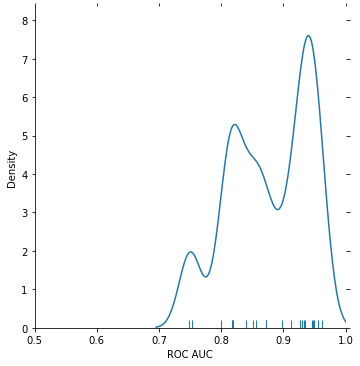

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
with plt.rc_context({'xtick.top': True, 'ytick.right': True, 'figure.figsize': (4, 4)}):
  sns.displot(list(auc_all.values()), bw_adjust=.5, kind='kde', rug=True)
  plt.xlim((.5, 1))
  plt.xlabel('ROC AUC')
  plt.savefig('figures/performance.eps')

In [1]:
df

NameError: name 'df' is not defined